In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
data = pd.read_csv("diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking Missing Values

In [10]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

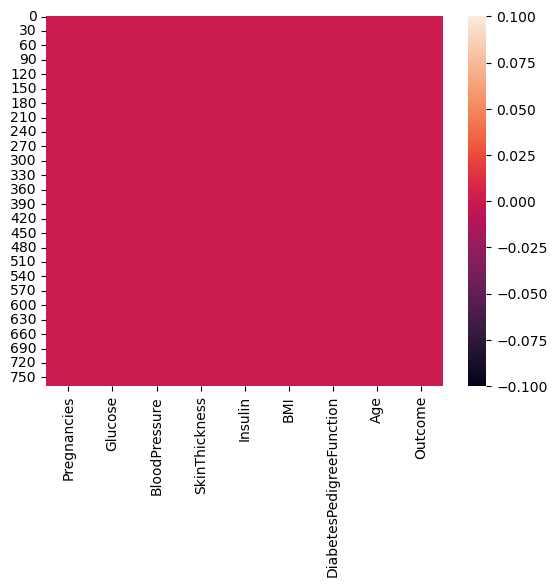

In [11]:
sns.heatmap(data.isnull())

In [12]:
# columns to replace zero with Na
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Replace 0 with Na
data[columns_with_zero] = data[columns_with_zero].replace(0, pd.NA)

In [13]:
# Check the sum of missing values 

miss_values = data.isna().sum()
miss_values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Convert pandas NA to numpy nan for compatibility

data = data.replace({pd.NA: np.nan})

# Impute missing values using median for Glucose, BloodPressure, and BMI

for column in ['Glucose', 'BloodPressure', 'BMI']:
    # Replace missing values in each column with the column's median
    data[column].fillna(data[column].median(), inplace=True)

# Check the number of missing values after median imputation

missing_values_after_median = data.isna().sum()
print(missing_values_after_median)

# Fill missing values for 'SkinThickness' and 'Insulin'

knn_imputer = KNNImputer(n_neighbors=5)

data[['SkinThickness', 'Insulin']] = knn_imputer.fit_transform(data[['SkinThickness', 'Insulin']])

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
missing_values_knn = data.isna().sum()
print(missing_values_knn)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Data Visualization

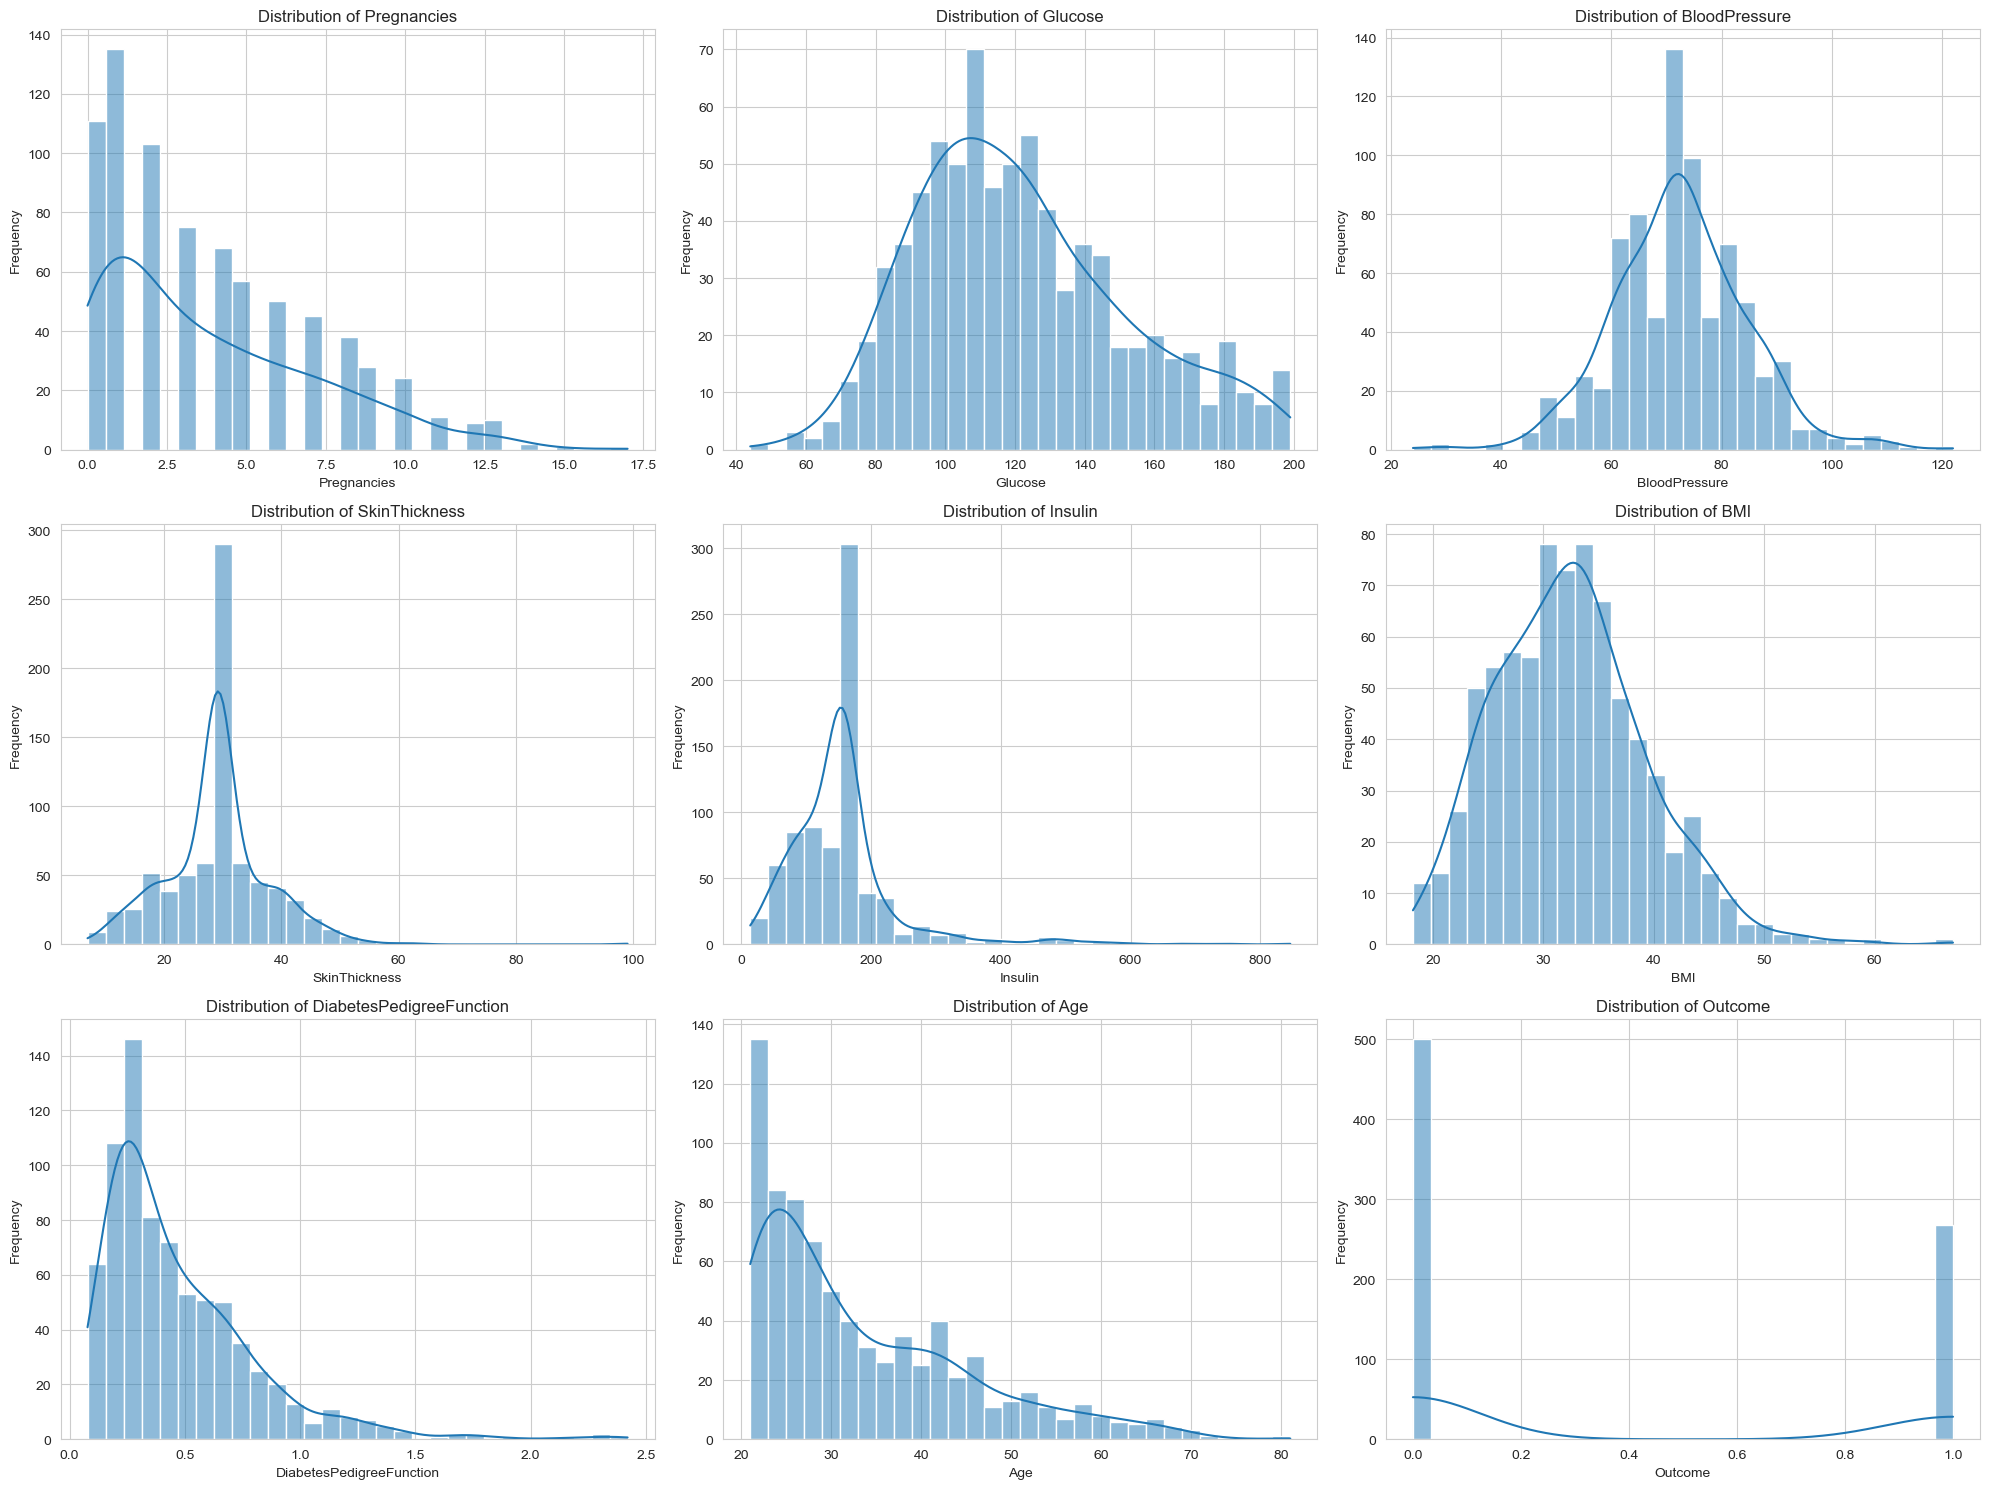

In [16]:
sns.set_style("whitegrid")


# Calculate the number of rows needed for subplots
num_columns = len(data.columns)
num_rows = int(np.ceil(num_columns / 3))  

plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 3, i)  
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms provide an overview of the distribution of each variable:

- **Pregnancies:** Most women in the dataset have had 0-2 pregnancies, with fewer women having a higher number of pregnancies.
- **Glucose:** The distribution is fairly normal, but there's a small peak around the lower values.
- **BloodPressure:** The distribution is somewhat normal, centered around 70.
- **SkinThickness:** There's a peak around the lower values.
- **Insulin:** Most values are on the lower side, with a few higher values.
- **BMI:** The distribution is slightly right-skewed, with a peak around 30.
- **DiabetesPedigreeFunction:** Most values are on the lower side, indicating that many individuals in the dataset have a lower likelihood based on their ancestry.
- **Age:** The majority of individuals are in their 20s and 30s.
- **Outcome:** More individuals do not have diabetes (0) than those who do (1).

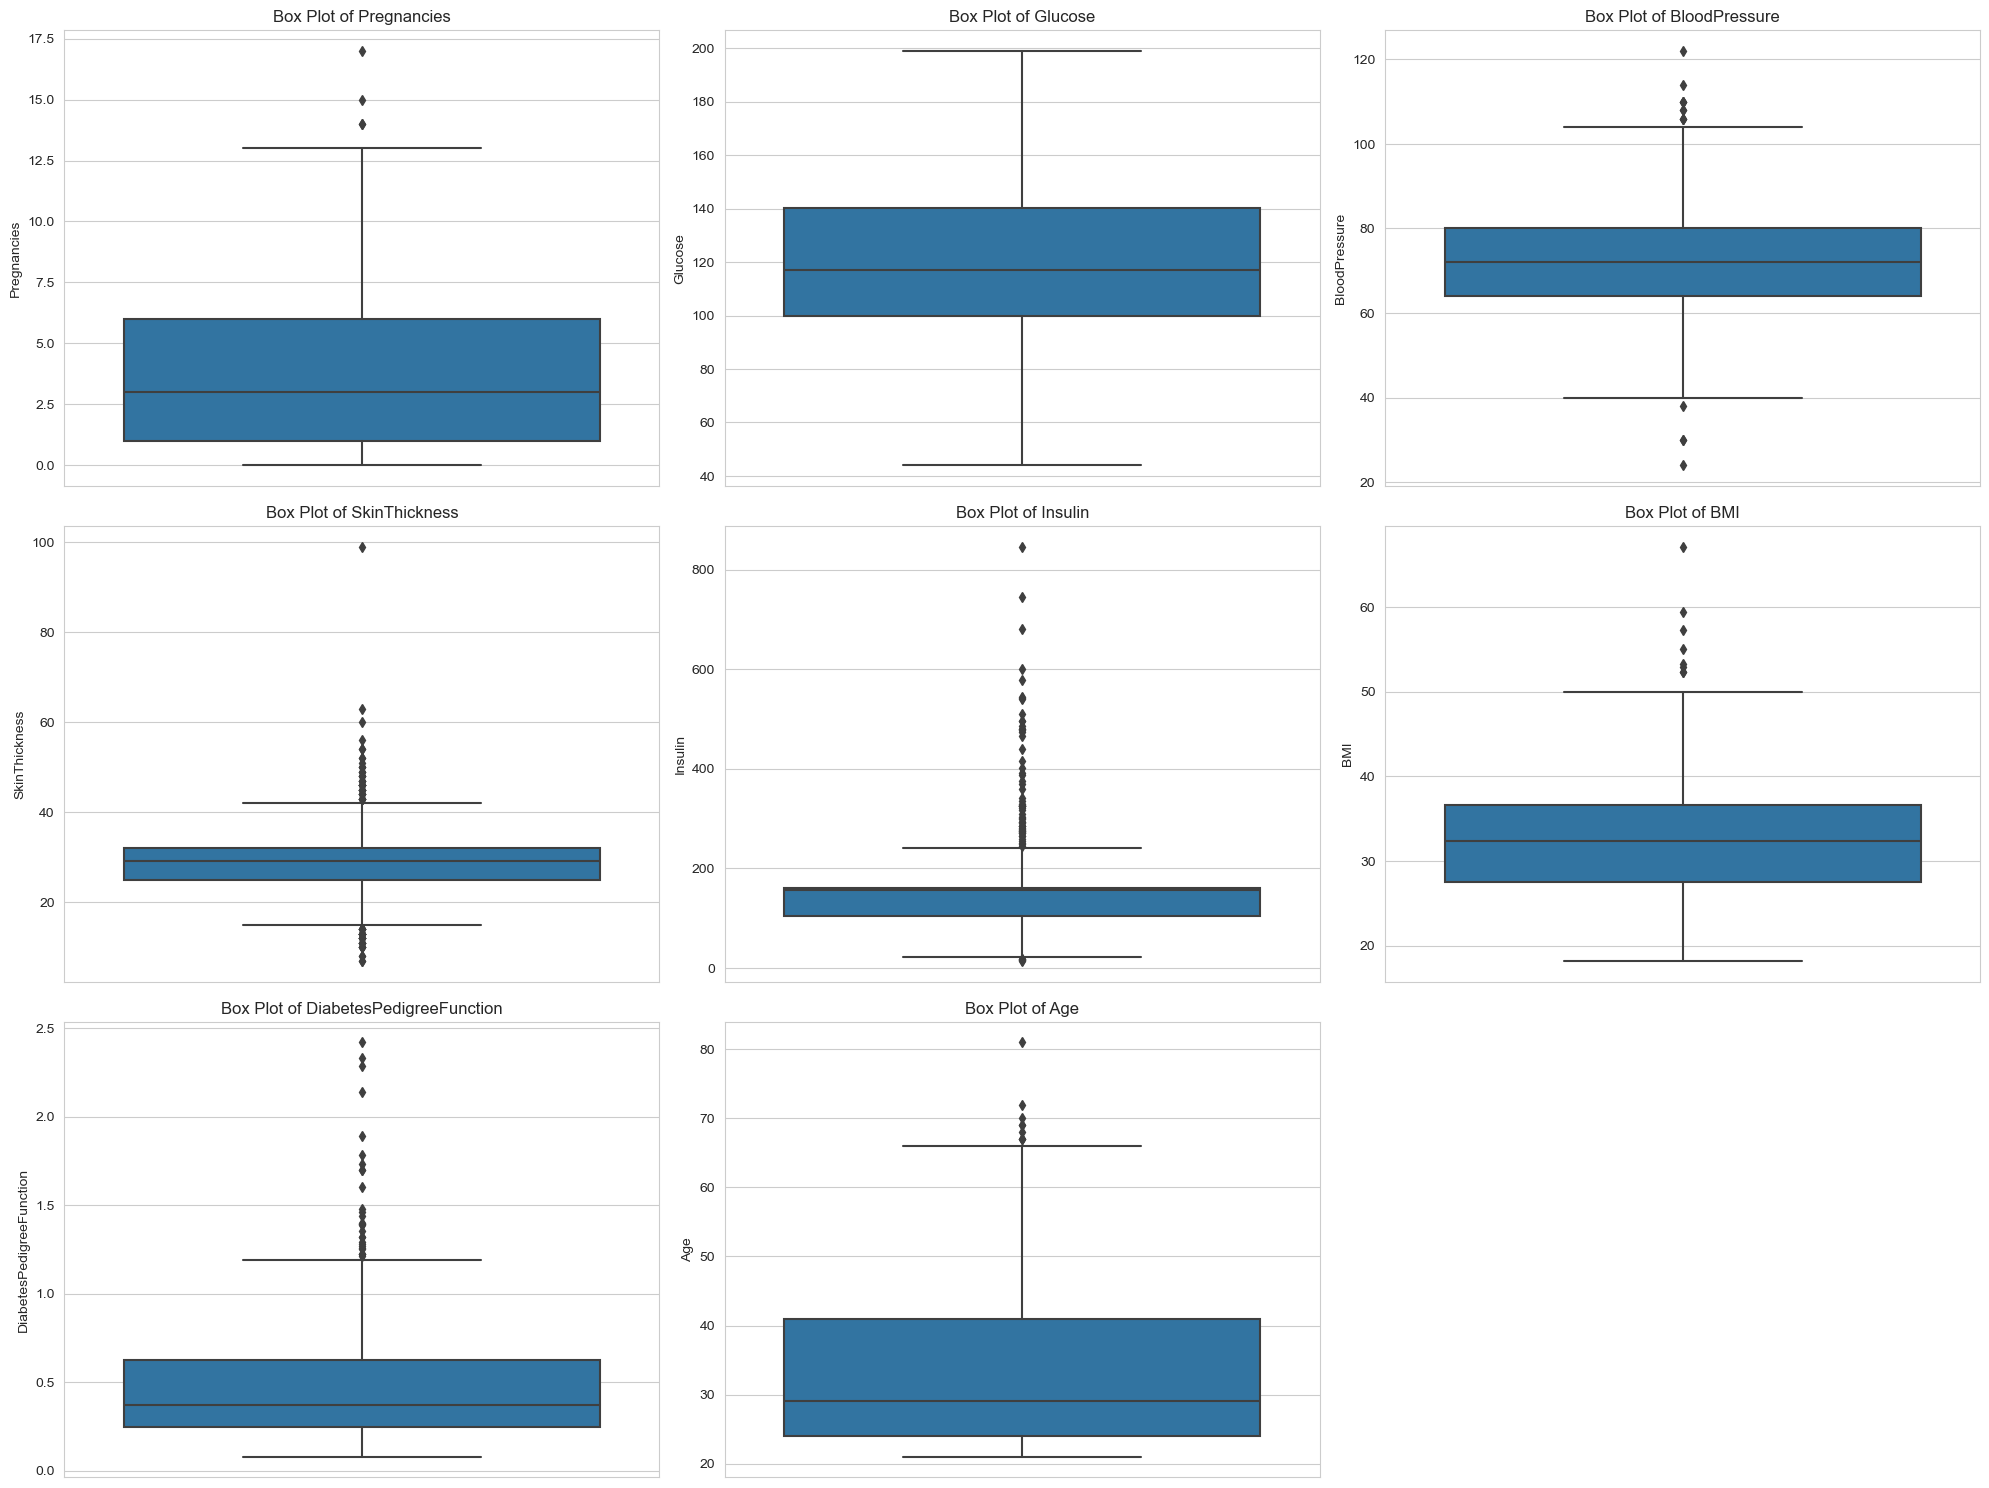

In [17]:
sns.set_style("whitegrid")


# Initialize the figure for box plots
plt.figure(figsize=(20, 15))

# Plot box plots for each variable (excluding Outcome)
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome' for box plots
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Box Plot Interpretations

- **Pregnancies**: The box plot reveals a median around 2 pregnancies, with outliers indicating that some women have experienced many more pregnancies.

- **Glucose**: Central values are tightly packed, with outliers present, suggesting a few individuals with significantly different glucose levels.

- **BloodPressure**: Most individuals have blood pressure within a normal range, with some outliers on the higher end.

- **SkinThickness**: There's a wide variation in skin thickness, with several outliers showing particularly high measurements.

- **Insulin**: The data for insulin levels shows significant variability and numerous high outliers, pointing to a diverse range of insulin levels in the population.

- **BMI**: The BMI values are mostly around the median, with a normal distribution and some high-value outliers.

- **DiabetesPedigreeFunction**: This metric shows a right-skewed distribution, with a number of outliers indicating higher hereditary risk factors for diabetes.

- **Age**: The majority of the population is concentrated in the younger age brackets, with a skew towards older ages among outliers.


## Co relation Matrix

In [18]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.082989   
Glucose                      0.128213  1.000000       0.218937       0.192925   
BloodPressure                0.208615  0.218937       1.000000       0.192837   
SkinThickness                0.082989  0.192925       0.192837       1.000000   
Insulin                      0.055575  0.414238       0.067406       0.167119   
BMI                          0.021559  0.231049       0.281257       0.542438   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.100966   
Age                          0.544341  0.266909       0.324915       0.127872   
Outcome                      0.221898  0.492782       0.165723       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.055575  0.021559                 -0.033523   
Glucose                   0.414238  0.231

## Visualizing the correlation

<AxesSubplot:>

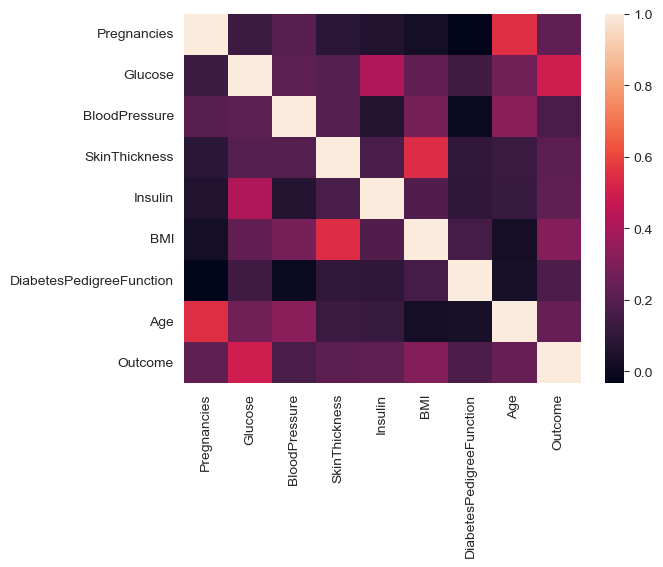

In [19]:
sns.heatmap(data.corr())

### Correlation Matrix Interpretations

- **Pregnancies**: Shows a notable positive correlation with Age, suggesting that as women get older, the number of pregnancies tends to be higher.
  
- **Glucose**: Has a strong positive correlation with Outcome, indicating higher glucose levels may be associated with diabetes.

- **BloodPressure**: Exhibits low to moderate correlations with other variables, not showing a strong relationship with diabetes Outcome.

- **SkinThickness**: Displays some positive correlation with BMI, which might be expected as both relate to body composition.

- **Insulin**: Does not show a strong correlation with most variables, but has a slight positive relationship with SkinThickness and BMI.

- **BMI**: Shows a moderate positive correlation with SkinThickness and DiabetesPedigreeFunction, suggesting a link between body mass, skin fold thickness, and genetic predisposition to diabetes.

- **DiabetesPedigreeFunction**: Exhibits some positive correlation with Age and BMI, but not a strong indicator for diabetes Outcome in this visualization.

- **Age**: Positively correlated with Pregnancies, indicating that older women in the dataset have been pregnant more often.

- **Outcome**: Strongly correlated with Glucose levels, and to a lesser extent with BMI and Age, which aligns with known risk factors for diabetes.


## Train test split

In [20]:
X=data.drop("Outcome", axis=1)

In [21]:
Y=data['Outcome']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape, X_test.shape

((614, 8), (154, 8))

## Train the model

In [23]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
prediction = model.predict(X_test)

In [25]:
print(prediction)

[1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1]


In [26]:
accuracy= accuracy_score(prediction,Y_test)

In [27]:
print(accuracy)

0.7857142857142857


In [28]:
class_report = classification_report(Y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.64      0.62      0.63        45

    accuracy                           0.79       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



In [29]:
confusion = confusion_matrix(Y_test, prediction)
print(confusion)

[[93 16]
 [17 28]]


## Hyperparameter Tuning

In this specific model, we employed hyperparameter tuning to maximize the effectiveness of our Logistic Regression model. Adjusting hyperparameters like 'C', 'penalty', and 'solver' is crucial to enhance the model's accuracy and generalization capabilities. This process helped us find the ideal combination that provides a balance between fitting and preventing overfitting, ensuring the model performs well not just on training data but also maintains robust performance on new, unseen data.


In [30]:
# Generate a mock dataset
X, y = make_classification(n_samples=1000, n_features=8, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space
space = {
    'C': hp.loguniform('C', np.log(0.001), np.log(100)),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
}

# Optimization objective
def objective(params):
    logreg = LogisticRegression(**params, solver='liblinear')
    accuracy = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Execute the optimization
trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=100,
                   trials=trials)

# Train the model with the best hyperparameters found
best_penalty = ['l1', 'l2'][best_params['penalty']]
best_C = best_params['C']

print(f"Best hyperparameters: Penalty: {best_penalty}, C: {best_C}")

# Train and evaluate the model
best_logreg = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear')
best_logreg.fit(X_train, y_train)
accuracy = best_logreg.score(X_test, y_test)

print(f"Accuracy with Bayesian Optimization: {accuracy}")

100%|███████████████████| 100/100 [00:01<00:00, 66.33trial/s, best loss: -0.865]
Best hyperparameters: Penalty: l2, C: 0.004690434846222941
Accuracy with Bayesian Optimization: 0.855


In [31]:
# Generate a mock dataset
X, y = make_classification(n_samples=1000, n_features=8, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' funciona bem com penalidades 'l1' e 'l2'
}

# Set up GridSearchCV with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the best hyperparameters and accuracy
print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)
print("Accuracy from GridSearchCV:", accuracy)

Best hyperparameters from GridSearchCV: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy from GridSearchCV: 0.86


We chose to use GridSearchCV over Bayesian Optimization for a few key reasons. GridSearchCV provides a thorough and systematic 
approach to explore a defined range of hyperparameters, testing 
every possible combination to find the optimal setting. This 
exhaustive search ensures that we don't miss any potential 
combinations that could yield the best performance. Although it can 
be more computationally intensive, GridSearchCV is ideal for 
scenarios where we have a manageable range of hyperparameters and 
seek the most comprehensive evaluation to guarantee the best 
possible model configuration.


## Apply the best parameters to the model 

In [32]:
best_params = grid_search.best_params_

In [33]:
# Criar um novo modelo com os melhores hiperparâmetros
model_2 = LogisticRegression(C=best_params['C'], 
                           penalty=best_params['penalty'], 
                           solver=best_params['solver'])

# Treinar o modelo com os dados de treinamento
model_2.fit(X_train, y_train)

# Fazer previsões com o modelo treinado
y_pred = model_2.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")


Acurácia do modelo: 0.86


In [34]:
# Model_2 classification
model_2_class= classification_report(y_test,y_pred)
print(model_2_class)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       102
           1       0.86      0.85      0.86        98

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



## Classification Report Analysis

### Classes:
- The report differentiates between two classes: 0 and 1. In the context of your diabetes dataset, 0 likely represents "No Diabetes" and 1 represents "Has Diabetes."

### Precision:
- For class 0 (No Diabetes): The precision is 0.86, indicating that 86% of all instances predicted as "No Diabetes" were correctly classified.
- For class 1 (Has Diabetes): The precision is 0.86, meaning 86% of all instances predicted as "Has Diabetes" were correct.

### Recall:
- For class 0 (No Diabetes): The recall is 0.87, showing that 87% of actual "No Diabetes" instances were correctly identified by the model.
- For class 1 (Has Diabetes): The recall is 0.85, indicating the model correctly identified 85% of the actual "Has Diabetes" instances.

### F1-Score:
- This metric provides a singular value that balances precision and recall. An F1-Score closer to 1 indicates better performance. For both classes, the F1-Score is 0.86, suggesting a balanced performance.

### Support:
- Shows the number of actual occurrences of each class in the test set: 102 instances of class 0 (No Diabetes) and 98 instances of class 1 (Has Diabetes).

### Overall Accuracy:
- The model achieved an overall accuracy of 86% on the test set, correctly classifying 86% of all instances.

### Macro and Weighted Averages:
- Macro Average computes the unweighted mean performance across classes, with precision, recall, and F1-score all being 0.86, indicating consistent performance.
- Weighted Average considers the number of true instances for each class and is more reflective in cases of class imbalance. Here, the weighted averages for precision, recall, and F1-score are also around 0.86, indicating good performance given the class distribution.

### Conclusion:
- The model demonstrates good performance in distinguishing between individuals with and without diabetes. Precision and recall are relatively high for both classes, showing reliable predictions and a high proportion of positive instance capture. The balanced F1-scores further suggest a well-managed trade-off between precision and recall for either class. The results indicate that the model is well-suited for this binary classification task on the provided dataset.



In [35]:
pred = model_2.predict(X_test)
print(pred)

[0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0
 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]


In [37]:
user_input = {
    'n1': input("Pregnancies: "),
    'n2': input("Glucose: "),
    'n3': input("Blood Pressure: "),
    'n4': input("Skin thickness: "),
    'n5': input("Insulin: "),
    'n6': input("BMI: "),
    'n7': input("Diabetes Pedigree Function: "),
    'n8': input("Age: ")
}

# Converter os valores de entrada do usuário para float
input_data = [float(value) for value in user_input.values()]

# Usar o modelo treinado para fazer a previsão
predicted_class = model_2.predict([input_data])[0]

# Imprimir o resultado da previsão
result = "Positive" if predicted_class == 1 else "Negative"
print(f"The prediction for the input data is: {result}")

Pregnancies: 1
Glucose: 85
Blood Pressure: 66
Skin thickness: 29
Insulin: 94
BMI: 26.6
Diabetes Pedigree Function: 0.167
Age: 31
The prediction for the input data is: Negative


In [38]:
import pickle

In [39]:
with open('model_2.pkl', 'wb') as file:
    pickle.dump(model, file)